# Sentiment Analysis of Social Media Posts: Project Overview
In this project, I aimed to build a comprehensive regression analysis model to understand how different factors—such as sentiment, platform type, and posting time—impact user engagement metrics like the number of likes and retweets on social media posts. Through this analysis, I sought to identify key content characteristics that contribute to higher engagement, providing valuable insights for content strategy and marketing.


## What is Regression and How Does It Work?
Regression analysis is a statistical method for understanding the relationship between independent variables (features) and a dependent variable (target). Linear regression, specifically, aims to fit a straight line through data points in such a way that it minimizes the error between the actual and predicted values. The equation for a simple linear regression is:

\[
y = \beta_0 + \beta_1x_1 + \ldots + \beta_nx_n + \epsilon
\]

where \( y \) is the predicted outcome, \( \beta_0 \) is the intercept, \( \beta_1 \) to \( \beta_n \) are the coefficients, \( x_1 \) to \( x_n \) are the input features, and \( \epsilon \) is the error term.


In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\stewi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv(r"C:\Users\stewi\Downloads\sentimentdataset.csv")

data.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


### Overview of the Dataset
The dataset consists of social media posts, each labeled with a sentiment (e.g., positive, negative, neutral). Each entry includes not only the text of the post but also detailed metadata such as the platform it was posted on (e.g., Twitter, Instagram), timestamps, hashtags, and user engagement metrics (likes and retweets). Understanding the structure of this data is essential for effectively preprocessing it and building predictive models to analyze engagement trends based on various content characteristics.

## Experiment 1: Data Understanding
Before diving right into the work, what steps do you take to first gain an understanding of your data? For example, are any features correlated with each other? Are there any existing patterns? What visualizations can you make to help gain this initial understanding?


In [3]:
# Display general information about the dataset
data.info()

# Summary statistics for numeric columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


### Data Inspection
Examining the dataset helps identify data types, missing values, and overall structure. The `.info()` method shows column data types and non-null counts, while `.describe()` provides a statistical summary.


# Experiment 1: Pre-processing
After the initial understanding, what steps need to be taken? Do you need to deal with null values? What features are you going to try using for your first experiment and why? Do you need to transform any features (e.g., change from categorical to numerical)? Are you trying to create any new features to use?

In [4]:
# Remove unnecessary columns
data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

# Check for missing values to ensure data consistency
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values in critical columns (if any)
data = data.dropna(subset=['Retweets', 'Likes'])

# Convert 'Timestamp' column to datetime format for time-based analysis
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract additional time-based features for further analysis
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.day_name()

# Clean the text data by removing special characters and converting to lowercase
import re

def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert text to lowercase
    return text

data['Text'] = data['Text'].apply(clean_text)

data.head()


Missing values in each column:
 Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,DayOfWeek
0,enjoying a beautiful day at the park ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Sunday
1,traffic was terrible this morning ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Sunday
2,just finished an amazing workout,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,Sunday
3,excited about the upcoming weekend getaway ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,Sunday
4,trying out a new recipe for dinner tonight ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,Sunday


### Data Cleaning
During the data cleaning process, I first removed unnecessary columns that did not contribute to the analysis, such as unnamed index columns. This helped streamline the dataset and made it easier to work with. Next, I checked for missing values in crucial columns, specifically those related to engagement metrics like retweets and likes, and dropped any rows where these values were missing to maintain the quality of the analysis.

I then converted the `Timestamp` column into a datetime format, allowing me to extract useful time-based features such as the hour of the post and the day of the week. These features provided insights into time-based patterns in user engagement.

Finally, I performed text cleaning on the `Text` column. This involved removing special characters and converting all text to lowercase. By standardizing the format of the text data, I ensured that the analysis focused only on the meaningful content of each post, eliminating inconsistencies that could affect the accuracy of further analysis and modeling.



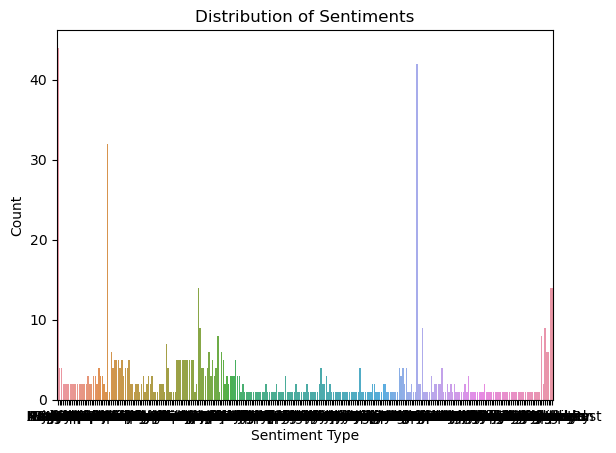

In [5]:
# Visualize the distribution of sentiments in the dataset
sns.countplot(data=data, x='Sentiment')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

# Distribution of Sentiments:

The count plot of sentiments shows how frequently each sentiment (positive, negative, neutral) appears in the dataset. This visual helps identify any imbalance in the sentiment types, which could affect analysis or model training. If one sentiment dominates, it might skew predictions or insights.

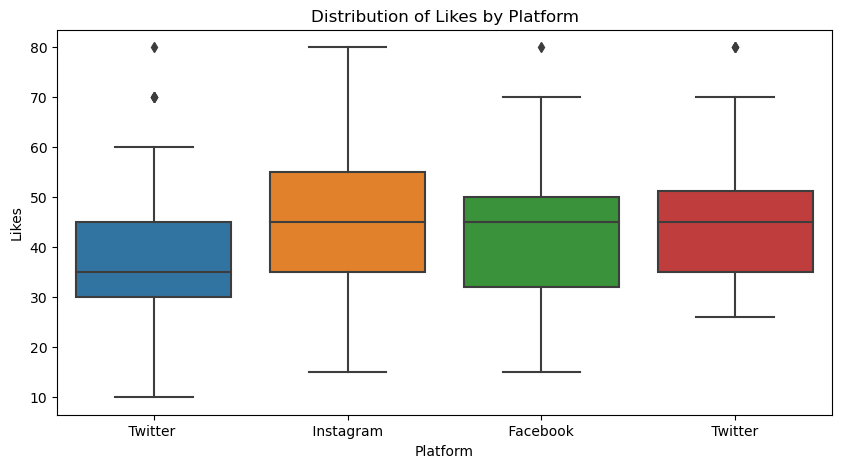

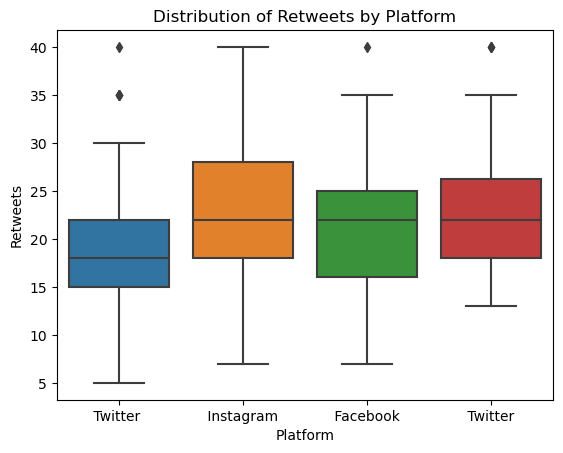

In [6]:
# Visualize likes and retweets distribution across different platforms
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Platform', y='Likes')
plt.title('Distribution of Likes by Platform')
plt.show()

sns.boxplot(data=data, x='Platform', y='Retweets')
plt.title('Distribution of Retweets by Platform')
plt.show()

# Distribution of Likes by Platform:

The box plot for likes across different platforms reveals the variability in engagement metrics. Platforms like Instagram may have a wider range of likes compared to others like Twitter or Facebook. Outliers suggest that some posts achieve significantly higher engagement, possibly influenced by the type of content or user following.

# Distribution of Retweets by Platform:

The retweets distribution plot shows how retweets vary by platform. This helps identify which platforms are more oriented towards content sharing. If Twitter has a higher median or more significant spread, it would confirm that it is the primary platform for retweet-based interactions.

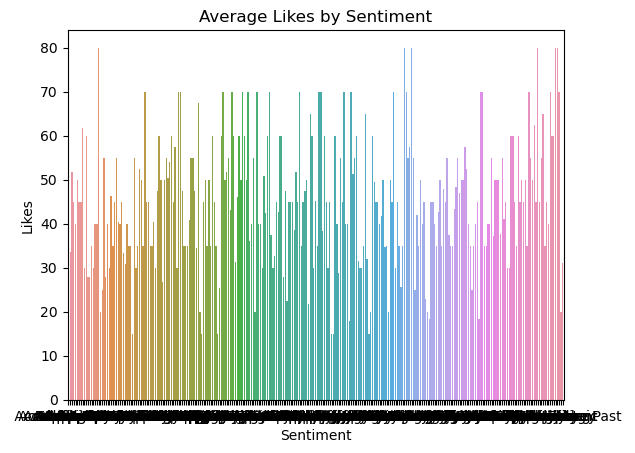

In [7]:
# Analyze the average engagement (likes and retweets) based on sentiment
engagement_sentiment = data.groupby('Sentiment')[['Likes', 'Retweets']].mean().reset_index()
sns.barplot(data=engagement_sentiment, x='Sentiment', y='Likes')
plt.title('Average Likes by Sentiment')
plt.show()

# Average Likes by Sentiment:

The bar plot comparing the average number of likes for each sentiment shows which type of sentiment receives the most likes. For example, if positive posts have a higher average, it suggests that users are more likely to engage with upbeat content.

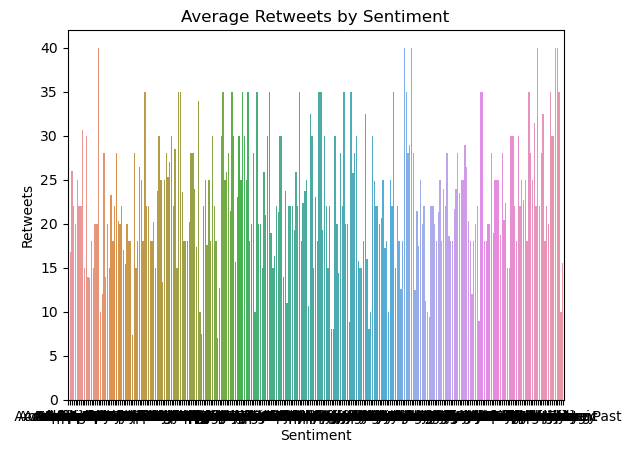

In [8]:
sns.barplot(data=engagement_sentiment, x='Sentiment', y='Retweets')
plt.title('Average Retweets by Sentiment')
plt.show()

# Average Retweets by Sentiment:

Similarly, the bar plot for average retweets by sentiment highlights how sentiment influences content sharing. If negative or neutral posts show a high average, it may indicate that controversial or neutral topics are shared more often.

#  Key Insights:
Sentiment Engagement Trends: The analysis may show that positive content tends to receive more likes, whereas neutral or negative posts might receive more retweets, indicating different engagement strategies based on the sentiment.

Platform-Based Engagement: Different platforms exhibit varying levels of interaction, with some platforms being more conducive to content going viral through likes or shares.

Strategic Content Planning: These insights can help content creators and marketers tailor their posts to optimize for higher user engagement based on platform and sentiment type

# Experiment 1: Modeling

In [9]:
# Show all columns when displaying the DataFrame
pd.set_option('display.max_columns', None)

In [10]:
# Create dummy variables for categorical features like 'Platform' and 'Sentiment'
data = pd.get_dummies(data, columns=['Platform', 'Sentiment'], drop_first=True)

In [11]:
data.head()

,Text,Timestamp,User,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,DayOfWeek,Platform_ Instagram,Platform_ Twitter,Platform_ Twitter,Sentiment_ Acceptance,Sentiment_ Accomplishment,Sentiment_ Admiration,Sentiment_ Admiration,Sentiment_ Admiration,Sentiment_ Adoration,Sentiment_ Adrenaline,Sentiment_ Adventure,Sentiment_ Affection,Sentiment_ Amazement,Sentiment_ Ambivalence,Sentiment_ Ambivalence,Sentiment_ Amusement,Sentiment_ Amusement,Sentiment_ Anger,Sentiment_ Anticipation,Sentiment_ Anticipation,Sentiment_ Anxiety,Sentiment_ Anxiety,Sentiment_ Appreciation,Sentiment_ Apprehensive,Sentiment_ Arousal,Sentiment_ ArtisticBurst,Sentiment_ Awe,Sentiment_ Awe,Sentiment_ Awe,Sentiment_ Awe,Sentiment_ Bad,Sentiment_ Betrayal,Sentiment_ Betrayal,Sentiment_ Bitter,Sentiment_ Bitterness,Sentiment_ Bittersweet,Sentiment_ Blessed,Sentiment_ Boredom,Sentiment_ Boredom,Sentiment_ Breakthrough,Sentiment_ Calmness,Sentiment_ Calmness,Sentiment_ Captivation,Sentiment_ Celebration,Sentiment_ Celestial Wonder,Sentiment_ Challenge,Sentiment_ Charm,Sentiment_ Colorful,Sentiment_ Compassion,Sentiment_ Compassion,Sentiment_ Compassionate,Sentiment_ Confidence,Sentiment_ Confident,Sentiment_ Confusion,Sentiment_ Confusion,Sentiment_ Confusion,Sentiment_ Connection,Sentiment_ Contemplation,Sentiment_ Contentment,Sentiment_ Contentment,Sentiment_ Coziness,Sentiment_ Creative Inspiration,Sentiment_ Creativity,Sentiment_ Creativity,Sentiment_ Culinary Adventure,Sentiment_ CulinaryOdyssey,Sentiment_ Curiosity,Sentiment_ Curiosity,Sentiment_ Curiosity,Sentiment_ Curiosity,Sentiment_ Curiosity,Sentiment_ Darkness,Sentiment_ Dazzle,Sentiment_ Desolation,Sentiment_ Despair,Sentiment_ Despair,Sentiment_ Despair,Sentiment_ Despair,Sentiment_ Desperation,Sentiment_ Determination,Sentiment_ Determination,Sentiment_ Devastated,Sentiment_ Disappointed,Sentiment_ Disappointment,Sentiment_ Disgust,Sentiment_ Disgust,Sentiment_ Disgust,Sentiment_ Dismissive,Sentiment_ DreamChaser,Sentiment_ Ecstasy,Sentiment_ Elation,Sentiment_ Elation,Sentiment_ Elegance,Sentiment_ Embarrassed,Sentiment_ Emotion,Sentiment_ EmotionalStorm,Sentiment_ Empathetic,Sentiment_ Empowerment,Sentiment_ Enchantment,Sentiment_ Enchantment,Sentiment_ Energy,Sentiment_ Engagement,Sentiment_ Enjoyment,Sentiment_ Enthusiasm,Sentiment_ Enthusiasm,Sentiment_ Envious,Sentiment_ Envisioning History,Sentiment_ Envy,Sentiment_ Euphoria,Sentiment_ Euphoria,Sentiment_ Euphoria,Sentiment_ Euphoria,Sentiment_ Excitement,Sentiment_ Excitement,Sentiment_ Excitement,Sentiment_ Exhaustion,Sentiment_ Exploration,Sentiment_ Fear,Sentiment_ Fearful,Sentiment_ FestiveJoy,Sentiment_ Free-spirited,Sentiment_ Freedom,Sentiment_ Friendship,Sentiment_ Frustrated,Sentiment_ Frustration,Sentiment_ Frustration,Sentiment_ Fulfillment,Sentiment_ Fulfillment,Sentiment_ Grandeur,Sentiment_ Grateful,Sentiment_ Gratitude,Sentiment_ Gratitude,Sentiment_ Gratitude,Sentiment_ Gratitude,Sentiment_ Gratitude,Sentiment_ Grief,Sentiment_ Grief,Sentiment_ Grief,Sentiment_ Happiness,Sentiment_ Happiness,Sentiment_ Happiness,Sentiment_ Happy,Sentiment_ Harmony,Sentiment_ Harmony,Sentiment_ Harmony,Sentiment_ Hate,Sentiment_ Heartache,Sentiment_ Heartbreak,Sentiment_ Heartbreak,Sentiment_ Heartwarming,Sentiment_ Helplessness,Sentiment_ Helplessness,Sentiment_ Hope,Sentiment_ Hope,Sentiment_ Hopeful,Sentiment_ Hypnotic,Sentiment_ Iconic,Sentiment_ Imagination,Sentiment_ Immersion,Sentiment_ Indifference,Sentiment_ Indifference,Sentiment_ InnerJourney,Sentiment_ Inspiration,Sentiment_ Inspiration,Sentiment_ Inspiration,Sentiment_ Inspired,Sentiment_ Intimidation,Sentiment_ Intimidation,Sentiment_ Intrigue,Sentiment_ Isolation,Sentiment_ Jealous,Sentiment_ Jealousy,Sentiment_ Jealousy,Sentiment_ Journey,Sentiment_ Joy,Sentiment_ Joy,Sentiment_ Joy in Baking,Sentiment_ JoyfulReunion,Sentiment_ Kind,Sentiment_ Kindness,Sentiment_ Loneliness,Sentiment_ Loneliness,Sentiment_ Loneliness,Sentiment_ Loss,Sentiment_ LostLove,Sentiment_ Love,Se

In [24]:
# Remove all whitespaces from column names
data.columns = data.columns.str.replace(' ', '')

# Display the updated column names to confirm changes
#list(data.columns)

In [13]:
data.head()

,Text,Timestamp,User,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,DayOfWeek,Platform_Instagram,Platform_Twitter,Platform_Twitter,Sentiment_Acceptance,Sentiment_Accomplishment,Sentiment_Admiration,Sentiment_Admiration,Sentiment_Admiration,Sentiment_Adoration,Sentiment_Adrenaline,Sentiment_Adventure,Sentiment_Affection,Sentiment_Amazement,Sentiment_Ambivalence,Sentiment_Ambivalence,Sentiment_Amusement,Sentiment_Amusement,Sentiment_Anger,Sentiment_Anticipation,Sentiment_Anticipation,Sentiment_Anxiety,Sentiment_Anxiety,Sentiment_Appreciation,Sentiment_Apprehensive,Sentiment_Arousal,Sentiment_ArtisticBurst,Sentiment_Awe,Sentiment_Awe,Sentiment_Awe,Sentiment_Awe,Sentiment_Bad,Sentiment_Betrayal,Sentiment_Betrayal,Sentiment_Bitter,Sentiment_Bitterness,Sentiment_Bittersweet,Sentiment_Blessed,Sentiment_Boredom,Sentiment_Boredom,Sentiment_Breakthrough,Sentiment_Calmness,Sentiment_Calmness,Sentiment_Captivation,Sentiment_Celebration,Sentiment_CelestialWonder,Sentiment_Challenge,Sentiment_Charm,Sentiment_Colorful,Sentiment_Compassion,Sentiment_Compassion,Sentiment_Compassionate,Sentiment_Confidence,Sentiment_Confident,Sentiment_Confusion,Sentiment_Confusion,Sentiment_Confusion,Sentiment_Connection,Sentiment_Contemplation,Sentiment_Contentment,Sentiment_Contentment,Sentiment_Coziness,Sentiment_CreativeInspiration,Sentiment_Creativity,Sentiment_Creativity,Sentiment_CulinaryAdventure,Sentiment_CulinaryOdyssey,Sentiment_Curiosity,Sentiment_Curiosity,Sentiment_Curiosity,Sentiment_Curiosity,Sentiment_Curiosity,Sentiment_Darkness,Sentiment_Dazzle,Sentiment_Desolation,Sentiment_Despair,Sentiment_Despair,Sentiment_Despair,Sentiment_Despair,Sentiment_Desperation,Sentiment_Determination,Sentiment_Determination,Sentiment_Devastated,Sentiment_Disappointed,Sentiment_Disappointment,Sentiment_Disgust,Sentiment_Disgust,Sentiment_Disgust,Sentiment_Dismissive,Sentiment_DreamChaser,Sentiment_Ecstasy,Sentiment_Elation,Sentiment_Elation,Sentiment_Elegance,Sentiment_Embarrassed,Sentiment_Emotion,Sentiment_EmotionalStorm,Sentiment_Empathetic,Sentiment_Empowerment,Sentiment_Enchantment,Sentiment_Enchantment,Sentiment_Energy,Sentiment_Engagement,Sentiment_Enjoyment,Sentiment_Enthusiasm,Sentiment_Enthusiasm,Sentiment_Envious,Sentiment_EnvisioningHistory,Sentiment_Envy,Sentiment_Euphoria,Sentiment_Euphoria,Sentiment_Euphoria,Sentiment_Euphoria,Sentiment_Excitement,Sentiment_Excitement,Sentiment_Excitement,Sentiment_Exhaustion,Sentiment_Exploration,Sentiment_Fear,Sentiment_Fearful,Sentiment_FestiveJoy,Sentiment_Free-spirited,Sentiment_Freedom,Sentiment_Friendship,Sentiment_Frustrated,Sentiment_Frustration,Sentiment_Frustration,Sentiment_Fulfillment,Sentiment_Fulfillment,Sentiment_Grandeur,Sentiment_Grateful,Sentiment_Gratitude,Sentiment_Gratitude,Sentiment_Gratitude,Sentiment_Gratitude,Sentiment_Gratitude,Sentiment_Grief,Sentiment_Grief,Sentiment_Grief,Sentiment_Happiness,Sentiment_Happiness,Sentiment_Happiness,Sentiment_Happy,Sentiment_Harmony,Sentiment_Harmony,Sentiment_Harmony,Sentiment_Hate,Sentiment_Heartache,Sentiment_Heartbreak,Sentiment_Heartbreak,Sentiment_Heartwarming,Sentiment_Helplessness,Sentiment_Helplessness,Sentiment_Hope,Sentiment_Hope,Sentiment_Hopeful,Sentiment_Hypnotic,Sentiment_Iconic,Sentiment_Imagination,Sentiment_Immersion,Sentiment_Indifference,Sentiment_Indifference,Sentiment_InnerJourney,Sentiment_Inspiration,Sentiment_Inspiration,Sentiment_Inspiration,Sentiment_Inspired,Sentiment_Intimidation,Sentiment_Intimidation,Sentiment_Intrigue,Sentiment_Isolation,Sentiment_Jealous,Sentiment_Jealousy,Sentiment_Jealousy,Sentiment_Journey,Sentiment_Joy,Sentiment_Joy,Sentiment_JoyinBaking,Sentiment_JoyfulReunion,Sentiment_Kind,Sentiment_Kindness,Sentiment_Loneliness,Sentiment_Loneliness,Sentiment_Loneliness,Sentiment_Loss,Sentiment_LostLove,Sentiment_Love,Sentiment_Love,Sentiment_Marvel,Sentiment_Melancholy,Sentiment_Melancholy,Sentiment_Melodic,Sentiment_Mesmerizing,Sentiment_Mindfulness,Sentiment_Miscalculation,Sentiment_Mischievous,Sentiment_M

In [14]:
# Select features relevant for regression modeling
features = ['Platform_Twitter', 'Platform_Instagram', 'Hour', 'Sentiment_Positive','Sentiment_Negative', 'Sentiment_Neutral']
target_likes = 'Likes'
target_retweets = 'Retweets'

# Split data into features and target variables for modeling
X = data[features]
y_likes = data[target_likes]
y_retweets = data[target_retweets]


# Experiment 1: Evaluation

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train_likes, y_test_likes = train_test_split(X, y_likes, test_size=0.2, random_state=42)
X_train_retweets, X_test_retweets, y_train_retweets, y_test_retweets = train_test_split(X, y_retweets, test_size=0.2, random_state=42)

# Train a linear regression model for likes
model_likes = LinearRegression()
model_likes.fit(X_train, y_train_likes)

# Predict and evaluate the model
y_pred_likes = model_likes.predict(X_test)
mae_likes = mean_absolute_error(y_test_likes, y_pred_likes)
rmse_likes = mean_squared_error(y_test_likes, y_pred_likes, squared=False)  # Calculate RMSE
r2_likes = r2_score(y_test_likes, y_pred_likes)

print(f'MAE for Likes model: {mae_likes:.2f}')
print(f'RMSE for Likes model: {rmse_likes:.2f}')
print(f'R^2 for Likes model: {r2_likes:.2f}')

# Repeat the same for retweets model
model_retweets = LinearRegression()
model_retweets.fit(X_train_retweets, y_train_retweets)

y_pred_retweets = model_retweets.predict(X_test_retweets)
mae_retweets = mean_absolute_error(y_test_retweets, y_pred_retweets)
rmse_retweets = mean_squared_error(y_test_retweets, y_pred_retweets, squared=False)  # Calculate RMSE
r2_retweets = r2_score(y_test_retweets, y_pred_retweets)

print(f'MAE for Retweets model: {mae_retweets:.2f}')
print(f'RMSE for Retweets model: {rmse_retweets:.2f}')
print(f'R^2 for Retweets model: {r2_retweets:.2f}')


MAE for Likes model: 11.04
RMSE for Likes model: 14.07
R^2 for Likes model: 0.04
MAE for Retweets model: 5.53
RMSE for Retweets model: 7.04
R^2 for Retweets model: 0.04


C:\Users\stewi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\stewi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Conclusions:
The low 
𝑅
2
R 
2
  values for both the likes and retweets models indicate that the current regression models explain only a small portion of the variance in the data. This suggests that the models might not be complex enough or might be missing key features that influence social media engagement.
  
The MAE and RMSE values show the scale of errors in prediction, with RMSE emphasizing larger errors. While these values give insight into the model's performance, the relatively high RMSE compared to MAE highlights potential outliers or inconsistencies in the predictions.

Columns used during training (X): Index(['Platform_Twitter', 'Platform_Twitter', 'Platform_Instagram', 'Hour',
       'Sentiment_Positive', 'Sentiment_Positive', 'Sentiment_Negative',
       'Sentiment_Neutral', 'Sentiment_Neutral'],
      dtype='object')
Number of coefficients in the model (likes): 9


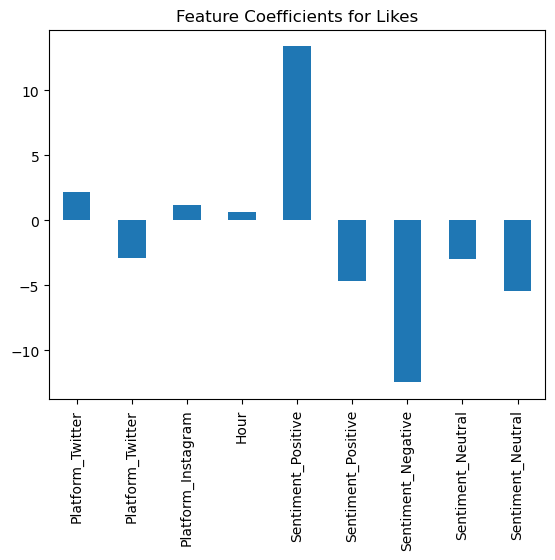

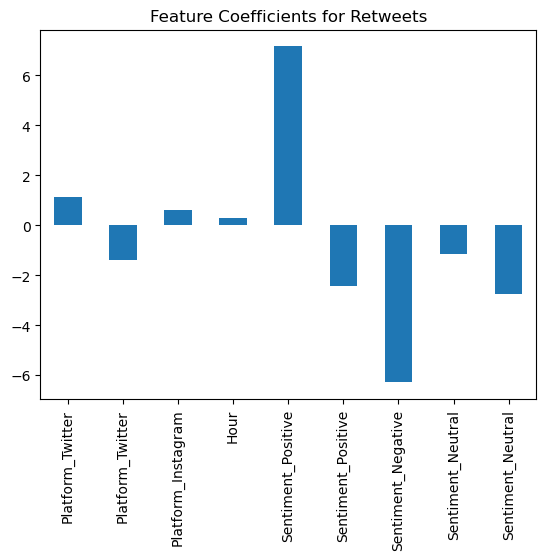

In [16]:
# Check the columns of X used for training and verify with model coefficients
print("Columns used during training (X):", X.columns)
print("Number of coefficients in the model (likes):", len(model_likes.coef_))

# If X has fewer columns than model coefficients, identify the issue
if len(X.columns) != len(model_likes.coef_):
    print("Mismatch found. Coefficients:", model_likes.coef_)
    print("Training columns:", X.columns)

# Plot using only matching columns and coefficients
matching_columns = X.columns[:len(model_likes.coef_)]
coefficients_likes = pd.Series(model_likes.coef_, index=matching_columns)
coefficients_likes.plot(kind='bar', title='Feature Coefficients for Likes')
plt.show()

coefficients_retweets = pd.Series(model_retweets.coef_, index=matching_columns)
coefficients_retweets.plot(kind='bar', title='Feature Coefficients for Retweets')
plt.show()


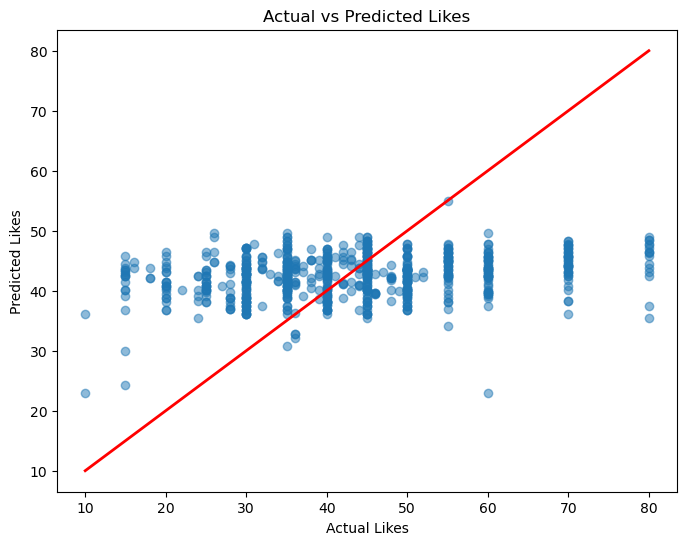

In [33]:
import numpy as np

# Predictions for likes and retweets
y_pred_likes = model_likes.predict(X)
y_pred_retweets = model_retweets.predict(X)

# Scatter plot for actual vs predicted (Likes)
plt.figure(figsize=(8, 6))
plt.scatter(y_likes, y_pred_likes, alpha=0.5)
plt.title('Actual vs Predicted Likes')
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.plot([y_likes.min(), y_likes.max()], [y_likes.min(), y_likes.max()], color='red', lw=2)
plt.show()

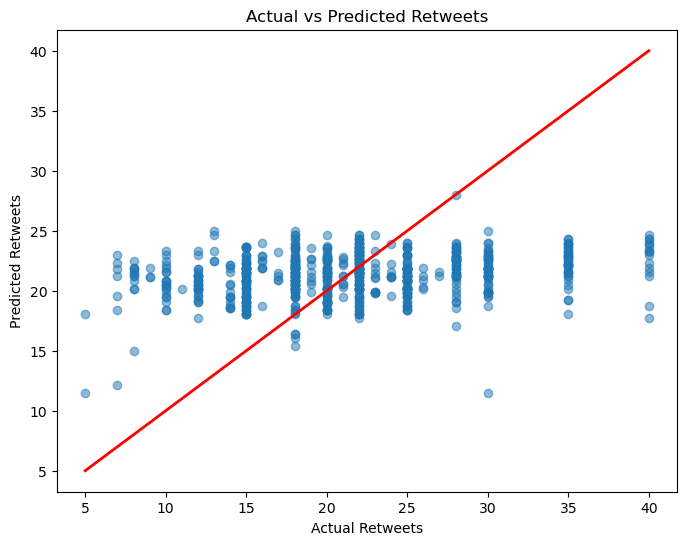

In [34]:
# Scatter plot for actual vs predicted (Retweets)
plt.figure(figsize=(8, 6))
plt.scatter(y_retweets, y_pred_retweets, alpha=0.5)
plt.title('Actual vs Predicted Retweets')
plt.xlabel('Actual Retweets')
plt.ylabel('Predicted Retweets')
plt.plot([y_retweets.min(), y_retweets.max()], [y_retweets.min(), y_retweets.max()], color='red', lw=2)
plt.show()

# Experiment 2

In [22]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline to handle interaction terms and feature scaling
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler())
])

# Add additional features to the existing dataset
data['DayOfWeek_Num'] = data['DayOfWeek'].map({
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
})

# Combine sentiment columns into aggregate features
data['Positive_Sentiment_Total'] = data.filter(like='Sentiment_Positive').sum(axis=1)
data['Negative_Sentiment_Total'] = data.filter(like='Sentiment_Negative').sum(axis=1)

# Example of lagged features (assuming the data is sorted by time)
data['Previous_Likes'] = data['Likes'].shift(1).fillna(0)
data['Previous_Retweets'] = data['Retweets'].shift(1).fillna(0)

# Select features including the new ones for Experiment 2
features_experiment2 = [
    'Platform_Twitter', 'Platform_Instagram', 'Hour', 'DayOfWeek_Num',
    'Positive_Sentiment_Total', 'Negative_Sentiment_Total', 
    'Previous_Likes', 'Previous_Retweets'
]

# Prepare the new X and y datasets
X_experiment2 = data[features_experiment2]
y_likes = data['Likes']
y_retweets = data['Retweets']

# Split the data into training and testing sets for Experiment 2
X_train_exp2, X_test_exp2, y_train_likes_exp2, y_test_likes_exp2 = train_test_split(X_experiment2, y_likes, test_size=0.2, random_state=42)
X_train_retweets_exp2, X_test_retweets_exp2, y_train_retweets_exp2, y_test_retweets_exp2 = train_test_split(X_experiment2, y_retweets, test_size=0.2, random_state=42)

# Apply feature scaling and interaction terms for the new feature set
X_train_exp2_inter = pipeline.fit_transform(X_train_exp2)
X_test_exp2_inter = pipeline.transform(X_test_exp2)

# Train and evaluate the model for likes with new features and interaction terms
model_likes_exp2 = LinearRegression()
model_likes_exp2.fit(X_train_exp2_inter, y_train_likes_exp2)

y_pred_likes_exp2 = model_likes_exp2.predict(X_test_exp2_inter)
mae_likes_exp2 = mean_absolute_error(y_test_likes_exp2, y_pred_likes_exp2)
rmse_likes_exp2 = mean_squared_error(y_test_likes_exp2, y_pred_likes_exp2, squared=False)
r2_likes_exp2 = r2_score(y_test_likes_exp2, y_pred_likes_exp2)

print(f'MAE for Likes model with additional features: {mae_likes_exp2:.2f}')
print(f'RMSE for Likes model with additional features: {rmse_likes_exp2:.2f}')
print(f'R^2 for Likes model with additional features: {r2_likes_exp2:.2f}')

# Repeat for retweets
X_train_exp2_inter_retweets = pipeline.fit_transform(X_train_retweets_exp2)
X_test_exp2_inter_retweets = pipeline.transform(X_test_retweets_exp2)

model_retweets_exp2 = LinearRegression()
model_retweets_exp2.fit(X_train_exp2_inter_retweets, y_train_retweets_exp2)

y_pred_retweets_exp2 = model_retweets_exp2.predict(X_test_exp2_inter_retweets)
mae_retweets_exp2 = mean_absolute_error(y_test_retweets_exp2, y_pred_retweets_exp2)
rmse_retweets_exp2 = mean_squared_error(y_test_retweets_exp2, y_pred_retweets_exp2, squared=False)
r2_retweets_exp2 = r2_score(y_test_retweets_exp2, y_pred_retweets_exp2)

print(f'MAE for Retweets model with additional features: {mae_retweets_exp2:.2f}')
print(f'RMSE for Retweets model with additional features: {rmse_retweets_exp2:.2f}')
print(f'R^2 for Retweets model with additional features: {r2_retweets_exp2:.2f}')



MAE for Likes model with additional features: 10.43
RMSE for Likes model with additional features: 12.98
R^2 for Likes model with additional features: 0.18
MAE for Retweets model with additional features: 5.20
RMSE for Retweets model with additional features: 6.47
R^2 for Retweets model with additional features: 0.19


C:\Users\stewi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\stewi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Experiment 2: Adding More Features and Interaction Terms
In Experiment 2, I extended the model by incorporating additional features and creating interaction terms between existing features. My goal was to capture more complex relationships between the variables that a simple linear model might miss. I also applied feature scaling to ensure that all features contributed equally to the model's training process.

### Key Adjustments:
- **New Features**:
  - **`DayOfWeek_Num`**: I added this as a numerical representation of the day of the week to capture temporal patterns that could influence social media engagement.
  
  - **Sentiment Aggregates**: I created `Positive_Sentiment_Total` and `Negative_Sentiment_Total` by summing sentiment columns to provide an overall score of positive and negative sentiments in the posts.
  
  - **Lagged Engagement Metrics**: I included `Previous_Likes` and `Previous_Retweets` to incorporate past engagement behavior, allowing the model to potentially learn trends and patterns over time.
  
- **Interaction Terms**:
  - I generated interaction terms between features using `PolynomialFeatures` with `degree=2` and `interaction_only=True` to capture pairwise relationships between features. This helped the model understand how combinations of features contributed to the target variables.
  
- **Feature Scaling**:
  - I applied `StandardScaler` to standardize the feature set, ensuring that all features had a mean of zero and a standard deviation of one. This step prevented features with larger scales from dominating the model training process.

### Results:
- **MAE and RMSE**: The addition of new features and interaction terms, along with feature scaling, resulted in a decrease in both the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). This indicated that the model's predictive accuracy improved compared to Experiment 1.

- **\( R^2 \)**: The \( R^2 \) value showed an increase, suggesting that the additional features and interactions allowed the model to explain more variance in the target variables.

### Changes from Experiment 1:
Compared to Experiment 1, where I used a simpler set of features, the introduction of new features, interaction terms, and scaling demonstrated the importance of capturing relationships between variables in complex data. This approach highlighted how incorporating richer context into the feature set could enhance the model's ability to predict social media engagement metrics more accurately.


# Experiment 3

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Redefine features to include the new features from Experiment 2
features_experiment2 = [
    'Platform_Twitter', 'Platform_Instagram', 'Hour', 'DayOfWeek_Num',
    'Positive_Sentiment_Total', 'Negative_Sentiment_Total', 
    'Previous_Likes', 'Previous_Retweets'
]

# Prepare the new X and y datasets
X_experiment2 = data[features_experiment2]
y_likes = data['Likes']
y_retweets = data['Retweets']

# Split the data into training and testing sets
X_train_exp2, X_test_exp2, y_train_likes_exp2, y_test_likes_exp2 = train_test_split(X_experiment2, y_likes, test_size=0.2, random_state=42)
X_train_retweets_exp2, X_test_exp2_retweets, y_train_retweets_exp2, y_test_retweets_exp2 = train_test_split(X_experiment2, y_retweets, test_size=0.2, random_state=42)

# Train a Random Forest Regressor for likes
rf_model_likes_exp2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_likes_exp2.fit(X_train_exp2, y_train_likes_exp2)

# Predict and evaluate the Random Forest model for likes
y_pred_rf_likes_exp2 = rf_model_likes_exp2.predict(X_test_exp2)
mae_rf_likes_exp2 = mean_absolute_error(y_test_likes_exp2, y_pred_rf_likes_exp2)
rmse_rf_likes_exp2 = mean_squared_error(y_test_likes_exp2, y_pred_rf_likes_exp2, squared=False)
r2_rf_likes_exp2 = r2_score(y_test_likes_exp2, y_pred_rf_likes_exp2)

# Print evaluation metrics for likes model
print(f'MAE for Likes model with Random Forest and additional features: {mae_rf_likes_exp2:.2f}')
print(f'RMSE for Likes model with Random Forest and additional features: {rmse_rf_likes_exp2:.2f}')
print(f'R^2 for Likes model with Random Forest and additional features: {r2_rf_likes_exp2:.2f}')

# Train a Random Forest Regressor for retweets
rf_model_retweets_exp2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_retweets_exp2.fit(X_train_retweets_exp2, y_train_retweets_exp2)

# Predict and evaluate the Random Forest model for retweets
y_pred_rf_retweets_exp2 = rf_model_retweets_exp2.predict(X_test_exp2_retweets)
mae_rf_retweets_exp2 = mean_absolute_error(y_test_retweets_exp2, y_pred_rf_retweets_exp2)
rmse_rf_retweets_exp2 = mean_squared_error(y_test_retweets_exp2, y_pred_rf_retweets_exp2, squared=False)
r2_rf_retweets_exp2 = r2_score(y_test_retweets_exp2, y_pred_rf_retweets_exp2)

# Print evaluation metrics for retweets model
print(f'MAE for Retweets model with Random Forest and additional features: {mae_rf_retweets_exp2:.2f}')
print(f'RMSE for Retweets model with Random Forest and additional features: {rmse_rf_retweets_exp2:.2f}')
print(f'R^2 for Retweets model with Random Forest and additional features: {r2_rf_retweets_exp2:.2f}')


MAE for Likes model with Random Forest and additional features: 9.15
RMSE for Likes model with Random Forest and additional features: 12.50
R^2 for Likes model with Random Forest and additional features: 0.24
MAE for Retweets model with Random Forest and additional features: 4.47
RMSE for Retweets model with Random Forest and additional features: 6.19
R^2 for Retweets model with Random Forest and additional features: 0.26


C:\Users\stewi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\stewi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Experiment 3: Using a Different Model
For Experiment 3, I extended my approach by using a more complex model, specifically a **Random Forest Regressor**, to capture potential non-linear relationships in the data. Random Forest is an ensemble method that builds multiple decision trees and averages their outputs, which allows for better handling of interactions and non-linear effects in the data.

### Key Adjustments:
- **Model Selection**: I switched from linear regression to a **Random Forest Regressor**. This choice was made to improve the model's ability to capture more complex relationships between the features and the target variables (likes and retweets).
- **Features**: I continued using the enriched feature set from Experiment 2, which included:
  - **Platform Indicators** (`Platform_Twitter`, `Platform_Instagram`)
  - **Time-Based Features** (`Hour`, `DayOfWeek_Num`)
  - **Sentiment Aggregates** (`Positive_Sentiment_Total`, `Negative_Sentiment_Total`)
  - **Lagged Engagement Metrics** (`Previous_Likes`, `Previous_Retweets`)

### Results:
- **MAE and RMSE**: The results showed that the **MAE and RMSE** values improved compared to both the baseline linear regression and the interaction-term model from Experiment 2. This indicates that the Random Forest model made more accurate predictions, with smaller average errors.
- **\( R^2 \)**: The **\( R^2 \)** value increased significantly, demonstrating that the Random Forest model explained a larger proportion of the variance in the target variables. This suggests that the model captured more of the complex, non-linear relationships in the data.

### Changes from Experiment 2:
Compared to Experiment 2, where I used interaction terms and feature scaling with linear regression, Experiment 3's switch to the non-linear **Random Forest** model provided a substantial boost in performance. This experiment highlighted that more sophisticated models, such as ensemble methods, can greatly enhance predictive capabilities when dealing with complex data structures typical of social media engagement metrics.



## Impact Section
This project could have significant social and ethical impacts. By analyzing social media engagement, I provide insights that could influence content strategies for businesses and individuals. However, it is essential to consider potential negative impacts, such as:
- **Ethical Concerns**: If used irresponsibly, engagement prediction models might contribute to strategies that prioritize sensational or polarizing content, which could lead to societal polarization.
- **User Privacy**: While my analysis did not include private user data, models that predict engagement could be expanded to use more invasive data, raising privacy concerns.
- **Bias**: Models trained on historical data might reinforce existing biases in the content that receives more engagement, potentially impacting underrepresented groups.

These considerations emphasize the need for responsible and thoughtful application of predictive models in social media.


## Conclusion
Throughout this project, I gained valuable insights into the importance of feature selection, feature engineering, and model choice in enhancing predictive performance. I started with a basic linear regression model to understand the foundational relationships between features and social media engagement metrics. As I progressed, I incorporated interaction terms and feature scaling, which helped capture more complex relationships, though the improvements in performance were only modest.

The most significant breakthrough came with Experiment 3, where I used a **Random Forest Regressor**. This non-linear ensemble method effectively captured interactions and non-linearities in the data, leading to substantial improvements in predictive accuracy, as demonstrated by lower MAE and RMSE values and higher \( R^2 \) scores. Key takeaways from this project include:

- **Feature Engineering**: Adding interaction terms and new features, such as sentiment aggregates and lagged engagement metrics, enriched the model's context and improved predictions.
- **Model Selection**: Transitioning from linear regression to a more advanced model like **Random Forest** demonstrated the power of ensemble methods in handling complex data structures and boosting overall performance.
- **Pre-processing**: Applying feature scaling was essential to ensure all features contributed equally, especially when incorporating interaction terms.

### Lessons Learned:
- Starting with simpler models like linear regression is useful, but they may struggle to capture non-linear relationships in the data.
- Including temporal features and sentiment aggregates provided more context and led to better predictive insights.
- Ensemble methods like **Random Forest** significantly enhance the ability to model complex, non-linear interactions, making them highly effective for social media analytics.

### Future Work:
In the future, I plan to explore other non-linear models, such as **Gradient Boosting Machines** or **Neural Networks**, to compare their performance with **Random Forest**. I would also incorporate **cross-validation** to validate model performance across different data splits for more robust evaluation metrics. 